In this demonstration we'll look at a sample example, which would be following the same procedure through which the assignment problem can be solved

In [1]:
#import all the necessary libraries

import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans


In [2]:
#Let's read the dataset first
dat = pd.read_csv('https://query.data.world/s/fgpmczptzlakpvpcuuoxrotp65hsjl')
dat.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Check the count of each type of species
dat.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

##### We will try to cluster the data into some similar types of species

In [4]:
## Let's drop species column as this is a label column and we don't need it in case of unsupervised learning models
dat.drop('species', axis = 1, inplace = True)

In [5]:
dat.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# Now, we need to create a ID columns, without this we will not be able to make necessary conclusions or we will not be able to
# identify that which observation goes to which cluster
dat['ID'] = dat.index+100

In [7]:
# Let's check the shape again
dat.head()

,sepal_length,sepal_width,petal_length,petal_width,ID
0,5.1,3.5,1.4,0.2,100
1,4.9,3.0,1.4,0.2,101
2,4.7,3.2,1.3,0.2,102
3,4.6,3.1,1.5,0.2,103
4,5.0,3.6,1.4,0.2,104


In [8]:
dat.shape

(150, 5)

#### The ID column will be useful while performing cluster profiling, I wanted to know which flower goes into which cluster

In [9]:
# Also, check the info again
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
ID              150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## Question-1:

Check if the data have some null values?

In [10]:
# Number of nulls per column
dat.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
ID              0
dtype: int64

### Let's perfrom Outlier treatment

## Question-2:

Which column have some outliers?

In [11]:
dat.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'ID'], dtype='object')

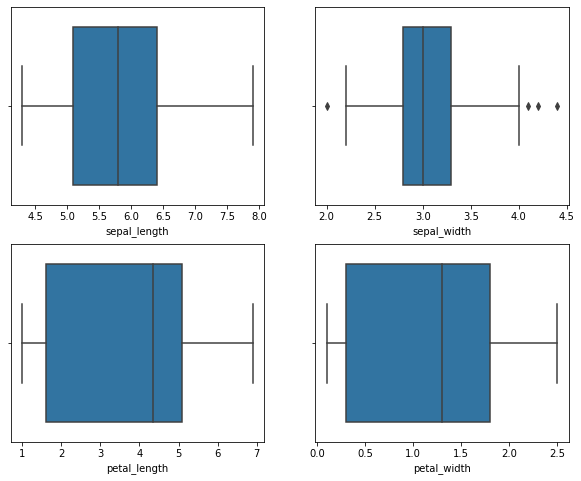

In [13]:
# Check outliers
plt.figure(figsize = (10,8))
var = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i in enumerate(var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x = i[1], data = dat)

In [ ]:
# Whenever you have so many outliers: Keep them for clustering, Clustering can create seperate cluster for all the outliers
# Less outlier: Deviate you cluster center. Treat them: Drop them you can cap them
# Capping: Less outliers
# Remove: Good number of data points


In [14]:
# Remove the outliers
q1 = dat['sepal_width'].quantile(0.01)
q4 = dat['sepal_width'].quantile(0.99)
dat = dat[(dat['sepal_width']>=q1) & (dat['sepal_width']<=q4)]
dat.shape

(147, 5)

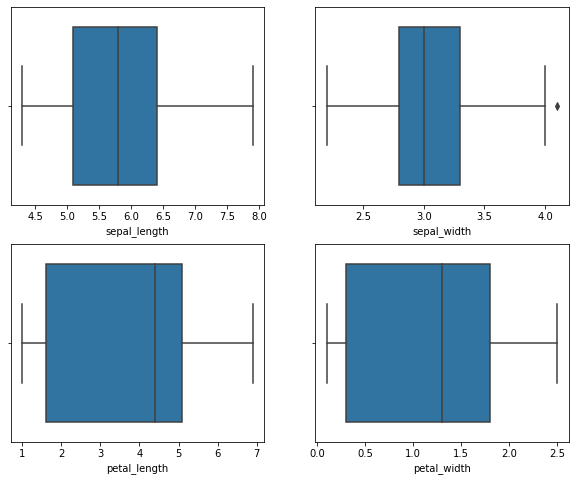

In [15]:
# Check outliers
plt.figure(figsize = (10,8))
var = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i in enumerate(var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x = i[1], data = dat)

### Let's begin with analysis part 

### 1. Principal Component Analysis

In [16]:
# Let's preserve the ID column to some variable, so that we can make use of it later after perfroming PCA
ID = dat['ID']

In [17]:
# Now let's drop the ID column as it is not a predictor in our data.
dat1 = dat.drop('ID', axis =1)

In [18]:
# Let's check the info about the data
dat1.shape

(147, 4)

## Question-3: 

In the below cell use standard scaler to standardise the data

After this, check what is the maximum value in the array we have?

In [19]:
## Let's scale the data with 4 columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dat2 =scaler.fit_transform(dat1)

In [20]:
# Check maximum value here
dat2.max()

2.6259485186334

## Question-4, 5 & 6: 

Now, we will perfrom PCA on the data we have, use svd_solver as randomized and random_state as 42

After this, check pca.components_, this will basically give you the all the vectors of the new feature space. Now check the first vector and check the first coponent of it.

- Which variable explains the maximum variance in the original data?
- What is the first coponent of the first vector obtained from pca.components_?
- What is the variance explained by the first principa component?

In [21]:
dat.head()

,sepal_length,sepal_width,petal_length,petal_width,ID
0,5.1,3.5,1.4,0.2,100
1,4.9,3.0,1.4,0.2,101
2,4.7,3.2,1.3,0.2,102
3,4.6,3.1,1.5,0.2,103
4,5.0,3.6,1.4,0.2,104


In [24]:
# Check the current variance of each column
100*dat1.var()/sum(dat1.var())

sepal_length    15.277335
sepal_width      3.583466
petal_length    68.309200
petal_width     12.829999
dtype: float64

In [26]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized', random_state = 42)
pca.fit(dat2)
# Eigen Value Decomposition

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [27]:
#first coponent of the first vector obtained from pca.components_
pca.components_

array([[ 0.52596008, -0.26018833,  0.58054446,  0.56447866],
       [ 0.35037234,  0.93325136,  0.02919306,  0.07368104],
       [-0.72877314,  0.21916958,  0.14327508,  0.63271372],
       [-0.26361889,  0.11536306,  0.80099198, -0.52498409]])

In [29]:
#What is the variance explained by the first principal component
pca.explained_variance_ratio_

array([0.72887519, 0.22823035, 0.03762798, 0.00526648])

Text(0, 0.5, 'Cumulative Variance')

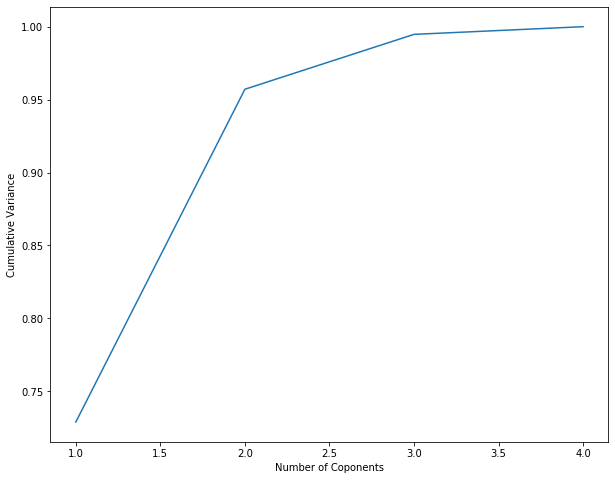

In [30]:
#Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (10,8))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Coponents')
plt.ylabel('Cumulative Variance')

## Question-7:

Choose the correct number of PCA from the cumulative variance plot.

What is the number of PCs we can go about?

In [ ]:
# What is the number of PCs we can go about?

# Answer here: 2

### Run the PCA with the components choosed above

In [31]:
#Finally let's go ahead and do dimenstionality reduction
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 2)

In [32]:
# Transform the data here
df_pca = pca_final.fit_transform(dat2)
df_pca.shape

(147, 2)

In [33]:
# Create a dataframe with the PCs obtained
pc  = pd.DataFrame(df_pca)
pca_df2 = pd.DataFrame({'PC1': pc[0], 'PC2':pc[1]})

In [34]:
# Check the head of the resultant data
pca_df2.head()

,PC1,PC2
0,-2.313492,0.602821
1,-2.116243,-0.641787
2,-2.406177,-0.264689
3,-2.338781,-0.535871
4,-2.441937,0.792186


In [35]:
#Let's add back the ID to the given principal components
pca_df2 = pd.DataFrame({'ID': list(ID), 'PC1': pc[0], 'PC2':pc[1]})

In [36]:
pca_df2.head()

,ID,PC1,PC2
0,100,-2.313492,0.602821
1,101,-2.116243,-0.641787
2,102,-2.406177,-0.264689
3,103,-2.338781,-0.535871
4,104,-2.441937,0.792186


## Clustering 

In [37]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

## Question 8:

Is the given data good for performing Clustering?

In [50]:
#Let's check the Hopkins measure
hopkins(pca_df2.drop('ID', axis=1))

0.8370172423223854

In [ ]:
#Answer here:Yes

In [39]:
# Now for perfroming clustering, we need to again drop the ID column, Let's drop it
dat3_1 = pca_df2.drop('ID', axis = 1)

In [40]:
# Check the shape of the resultant data
dat3_1.head()

,PC1,PC2
0,-2.313492,0.602821
1,-2.116243,-0.641787
2,-2.406177,-0.264689
3,-2.338781,-0.535871
4,-2.441937,0.792186


### K- means Clustering

## Question-7: Look at the silhouette score plot and choose the optimal number of cluster

In [ ]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score

ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(dat3_1)
    ss.append([k, silhouette_score(dat3_1, kmeans.labels_)])
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

## Question-8: Look at the Elbow Curve plot and choose the optimal number of cluster

In [ ]:
#Now let's proceed to the elbow curve method

ssd = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(dat3_1)
    ssd.append([k, kmeans.inertia_])
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

## KMeans with the K the we have choosed

In [64]:
#Let's perform K means using K=3
model_kmean = KMeans(n_clusters = 3, random_state = 50)
model_kmean.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [65]:
pca_df2.columns

Index(['ID', 'PC1', 'PC2'], dtype='object')

In [68]:
# Let's add the cluster Ids to the PCs data 
dat_km = pd.concat([pca_df2.reset_index().drop('index', axis = 1), pd.Series(model_kmean.labels_).reset_index().drop('index', axis  =1)], axis = 1)
dat_km.columns = ['ID', 'PC1', 'PC2', 'ClusterID']
dat_km.head()

,ID,PC1,PC2,ClusterID
0,100,-2.313492,0.602821,1
1,101,-2.116243,-0.641787,1
2,102,-2.406177,-0.264689,1
3,103,-2.338781,-0.535871,1
4,104,-2.441937,0.792186,1


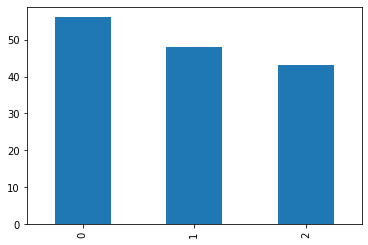

In [71]:
# Check the count of observation per cluster
dat_km['ClusterID'].value_counts().plot(kind = 'bar')

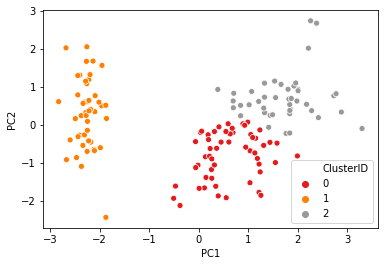

In [74]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'ClusterID', data = dat_km, palette='Set1')

## Cluster Profiling

In [75]:
# Let's merge the original data with the data(ClusterID)
dat5 = pd.merge(dat, dat_km[['ID', 'ClusterID']], on = 'ID')

In [76]:
# Let's drop PCs from the data
dat5.head()

,sepal_length,sepal_width,petal_length,petal_width,ID,ClusterID
0,5.1,3.5,1.4,0.2,100,1
1,4.9,3.0,1.4,0.2,101,1
2,4.7,3.2,1.3,0.2,102,1
3,4.6,3.1,1.5,0.2,103,1
4,5.0,3.6,1.4,0.2,104,1


#### So we have performed the clustering using the PCs and have now allocated the clusterIDs back to each of the datapoints

## Analysis of the clusters

In [77]:
dat5.drop('ID', axis =1).groupby('ClusterID').mean()

,sepal_length,sepal_width,petal_length,petal_width
ClusterID,,,,
0,5.866071,2.691071,4.444643,1.442857
1,4.981250,3.381250,1.464583,0.241667
2,6.806977,3.127907,5.539535,1.995349


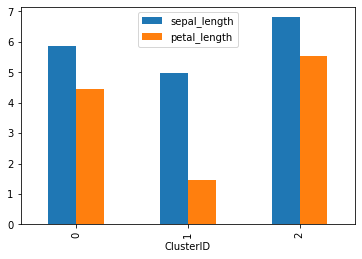

In [79]:
dat5[['sepal_length', 'petal_length', 'ClusterID']].groupby('ClusterID').mean().plot(kind = 'bar')

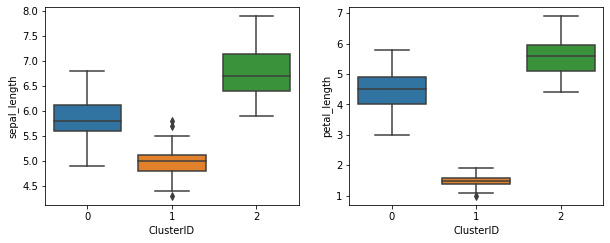

In [82]:
# Check outliers
plt.figure(figsize = (10,8))
var = ['sepal_length', 'petal_length']
for i in enumerate(var):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x= 'ClusterID', y = i[1], data = dat5)

## Finding the observations that belong to certain cluster

In [ ]:
## Hirearchieal Clustering + Profiling

In [83]:
#Let's use the concept of binning
# Find the counteries

dat5[dat5['ClusterID'] ==1]['ID']

0     100
1     101
2     102
3     103
4     104
5     105
6     106
7     107
8     108
9     109
10    110
11    111
12    112
13    113
14    114
15    116
16    117
17    118
18    119
19    120
20    121
21    122
22    123
23    124
24    125
25    126
26    127
27    128
28    129
29    130
30    131
31    132
32    134
33    135
34    136
35    137
36    138
37    139
38    140
39    141
40    142
41    143
42    144
43    145
44    146
45    147
46    148
47    149
Name: ID, dtype: int64